In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
data=pd.read_csv('C:/Users/theop\Documents/000AAA DATASCIENTIST/000 PROJET AUS\meteo_knn_imputer.csv')
X = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 16)

In [5]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))
display(rf.score(X_test, y_test))
y_pred = rf.predict(X_test)

1.0

0.8618030513176145

In [6]:
pca = PCA(n_components=2)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_new_train = pca.fit_transform(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_new_test = pca.fit_transform(X_test_scaled)

coeff = pca.components_.transpose()

print('Part de variance expliquée:', pca.explained_variance_ratio_)
print('Part de variance expliquée cumulative:', np.cumsum(pca.explained_variance_ratio_))

Part de variance expliquée: [0.06279439 0.04116044]
Part de variance expliquée cumulative: [0.06279439 0.10395483]


In [7]:
df_pca = pd.DataFrame(coeff, index = X_train.columns)
display(df_pca)

,0,1
MinTemp,0.290618,0.219095
MaxTemp,0.380731,0.014701
Rainfall,-0.048092,0.205215
Evaporation,0.272470,0.022009
Sunshine,0.221450,-0.232394
...,...,...
WindDir3pm_SSW,-0.037605,-0.018011
WindDir3pm_SW,-0.026791,-0.014876
WindDir3pm_W,-0.036282,0.059543
WindDir3pm_WNW,-0.001503,0.072704


In [8]:
df_pca2 = df_pca[(abs(df_pca[0]) + abs(df_pca[1])) > 0.2]
df_pca2

,0,1
MinTemp,0.290618,0.219095
MaxTemp,0.380731,0.014701
Rainfall,-0.048092,0.205215
Evaporation,0.272470,0.022009
Sunshine,0.221450,-0.232394
WindGustSpeed,0.073472,0.295843
WindSpeed9am,0.077018,0.205173
WindSpeed3pm,0.059652,0.252163
Humidity9am,-0.278320,0.109337
Humidity3pm,-0.231655,0.241910


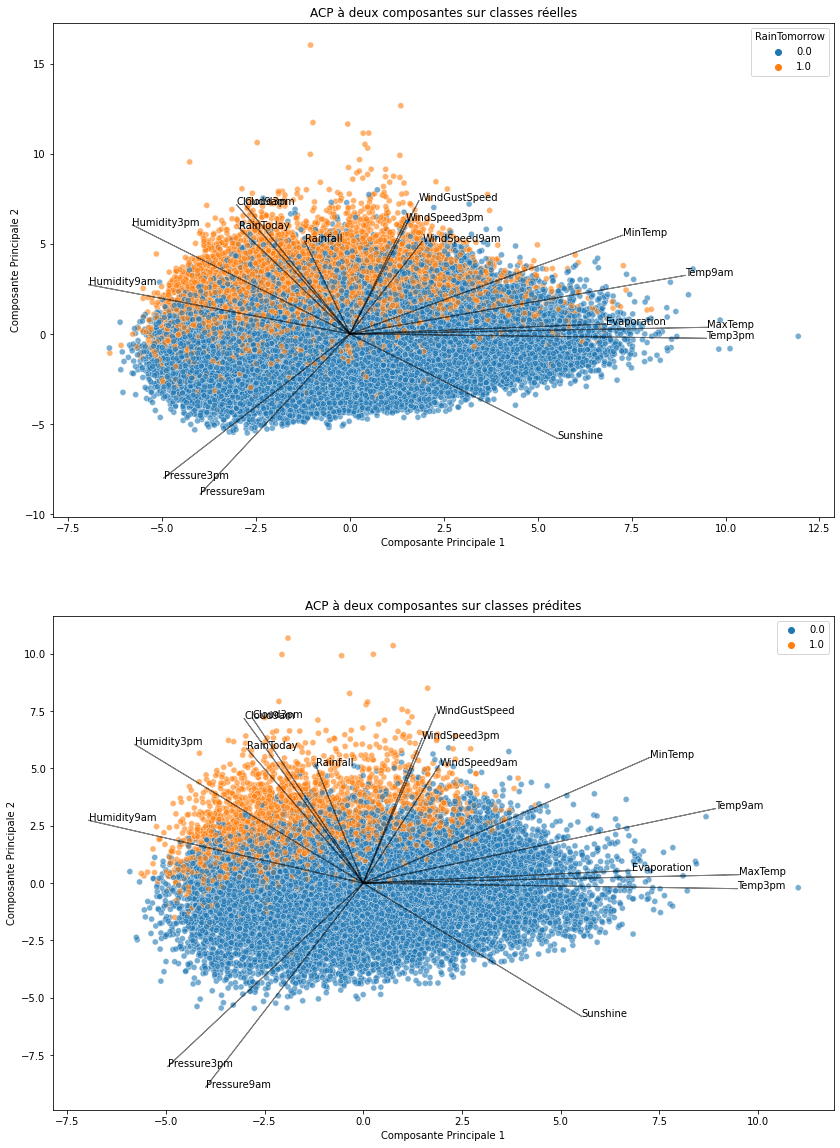

In [13]:
plt.figure(figsize=(14, 20))
plt.subplot(211)
sns.scatterplot(x=X_new_train[:, 0], y=X_new_train[:, 1], hue= y_train, alpha=0.6)
coeff = pca.components_.transpose()
for index, row in df_pca2.iterrows():
    plt.arrow(0, 0, row[0]*25, row[1]*25,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(row[0]*25, row[1]*25, index, color='k')
    plt.ylabel('Composante Principale 2')
    plt.xlabel('Composante Principale 1')
plt.title('ACP à deux composantes sur classes réelles')

plt.subplot(212)
sns.scatterplot(x=X_new_test[:, 0], y=X_new_test[:, 1], hue= y_pred, alpha=0.6)
for index, row in df_pca2.iterrows():
    plt.arrow(0, 0, row[0]*25, row[1]*25,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(row[0]*25, row[1]*25, index, color='k')
    plt.ylabel('Composante Principale 2')
    plt.xlabel('Composante Principale 1')
plt.title('ACP à deux composantes sur classes prédites');